In [147]:
import numpy as np
import pandas as pd
from numpy.linalg import norm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_samples, silhouette_score

# Custom algorithm

In [148]:
class Kmeans:
    '''Implementing Kmeans algorithm.'''

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initialize_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        '''
        random_idx - (collection) permutation of numbers from 0 to m
        '''
        centroids = X[random_idx[:self.n_clusters]]
        '''
        centroids - collection created from X getting n_clusters examples with random indexes
        centroids.shape = (m, n_clusters)
        '''
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        '''
        X.shape = (m, n)
        centroids.shape = (n_clusters, n)
        m - number of examples
        n - number of characteristics
        n_clusters - initial number of centroids
        '''
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
            '''
            compute centroid for every cluster 
            X[labels == k, :] - choose examples from X that have an certain index from the labels array
            and 
            np.mean(X[labels == k, :], axis=0) - take the mean value of such array for every characteristic
            For example, 
            np.array([[3, 2], [4, 4], [5, 4], [4, 2], [4, 6], [9, 5]]) 
            np.array([0, 1, 1, 0, 2, 1])
            np.array([points[labels==k].mean(axis=0) for k in range(L)]) => [[3.5, 2.], [6., 4.33333333], [4., 6.]]
            for 0 take values with index 0 and 3 and find mean for each characteristic
            for 1 take values with index 1, 2 and 5 and find mean for each characteristic
            for 2 take values with index 4 
            '''
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        '''
        X.shape = (m, n)
        distance = (m, n_clusters)
        m - number of examples
        n - number of characteristics
        n_clusters - initial number of centroids
        '''
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            '''
            Frobenius norm 
            row_norm.shape = (m, 1)
            '''
            distance[:, k] = np.square(row_norm)
            '''
            distance[:, k]. shape = (m , 1)
            np.square(row_norm) = (m , 1)
            compute distance for all examples from all clusters
            '''
        return distance

    def find_closest_cluster(self, distance):
        '''
        np.argmin(distance, axis=1).shape = (m, 1)
        for each row in distance matrix find index of minimal element
        this values will be in range (n_clusters)
        '''
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance_f_norm = np.zeros(X.shape[0])
        '''
        distance_f_norm.shape = (m, )
        '''
        for k in range(self.n_clusters):
            distance_f_norm[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
            '''
            Frobenius norm 
            for every cluster write in rows with indexes from labes array norm 
            '''
        return np.sum(np.square(distance_f_norm))
    
    def fit(self, X):
        self.centroids = self.initialize_centroids(X)
        '''
        initialize centroids by n_clusters random examples from X
        '''
        for i in range(self.max_iter):
            old_centroids = self.centroids
            '''
            save current centroids for next computation
            '''
            distance = self.compute_distance(X, old_centroids)
            '''
            get distanses from all points to centroids
            '''
            self.labels = self.find_closest_cluster(distance)
            '''
            get array with m values in range (n_clusters)
            '''
            self.centroids = self.compute_centroids(X, self.labels)
            '''
            set new centroids
            '''
            if np.all(old_centroids == self.centroids):
                '''
                if centroids don't change
                '''
                break
        self.cost = self.compute_sse(X, self.labels, self.centroids)
    
    def predict(self, X):
        distance = self.compute_distance(X, self.centroids)
        '''
        predict cluster of example based by its distance from centroid
        '''
        return self.find_closest_cluster(distance)

In [149]:
def draw_comparison_3d(X, y_actual, y_predicted, x_label, y_label, z_label):
    fig = plt.figure(figsize=(16, 8))
    ax = fig.add_subplot(121, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_actual)
    ax.set_xlabel(x_label, fontsize=18)
    ax.set_ylabel(y_label, fontsize=18)
    ax.set_zlabel(z_label, fontsize=18)
    ax.set_title('Actual', fontsize=18)
    ax = fig.add_subplot(122, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_predicted)
    ax.set_xlabel(x_label, fontsize=18)
    ax.set_ylabel(y_label, fontsize=18)
    ax.set_zlabel(z_label, fontsize=18)
    ax.set_title('Predicted', fontsize=18)

# Clustering

## Custom

In [162]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y = True)

In [163]:
km = Kmeans(n_clusters = 3, max_iter=1000, random_state=123)

In [164]:
km.fit(X)

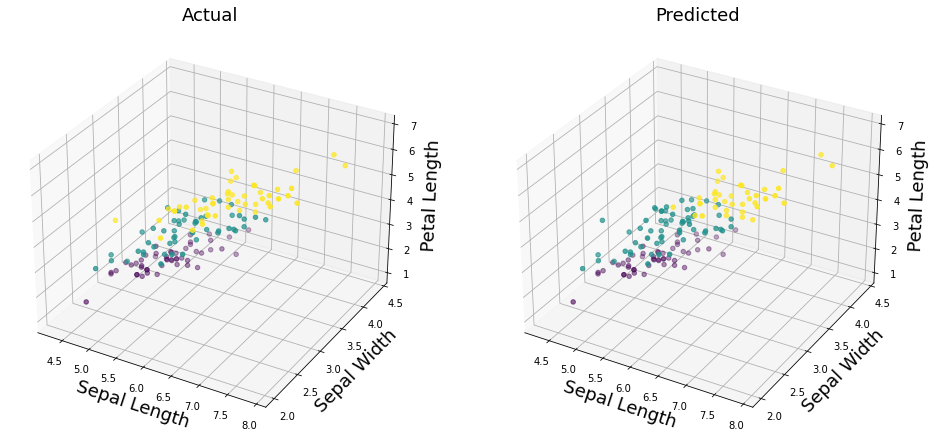

In [165]:
draw_comparison_3d(X[:, :3], y, km.labels, 'Sepal Length', 'Sepal Width', 'Petal Length')

In [166]:
km.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int64)

In [167]:
pd.DataFrame(confusion_matrix(y, km.predict(X)))

,0,1,2
0,50,0,0
1,0,47,3
2,0,14,36


## Scikit-learn

In [184]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y = True)

In [185]:
km_sk = KMeans(n_clusters = 3)

In [186]:
km_sk.fit(X)

KMeans(n_clusters=3)

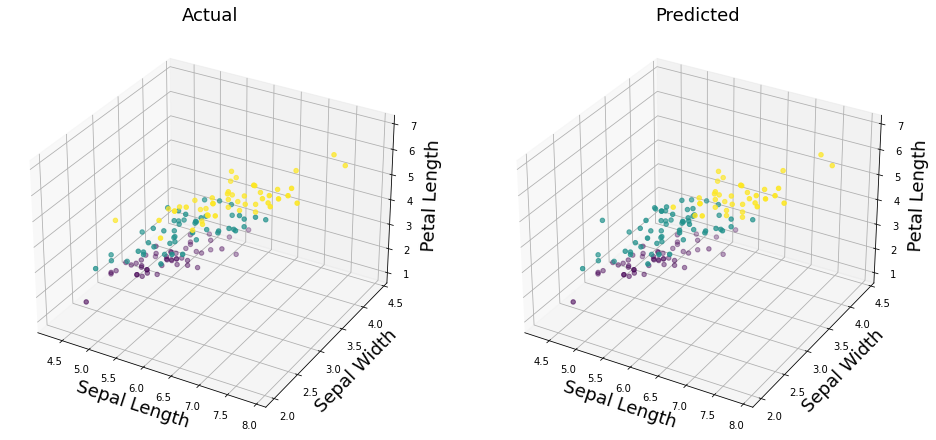

In [187]:
draw_comparison_3d(X[:, :3], y, km_sk.labels_, 'Sepal Length', 'Sepal Width', 'Petal Length')

In [188]:
pd.DataFrame(confusion_matrix(y, km_sk.predict(X)))

,0,1,2
0,50,0,0
1,0,48,2
2,0,14,36


# Elbow method

## For custom algorithm 

In [189]:
costs = []
K = range(1,10)
for k in K:
    kmeanModel_custom = Kmeans(n_clusters=k, max_iter=1000, random_state=123)
    kmeanModel_custom.fit(X)
    costs.append(kmeanModel_custom.cost)

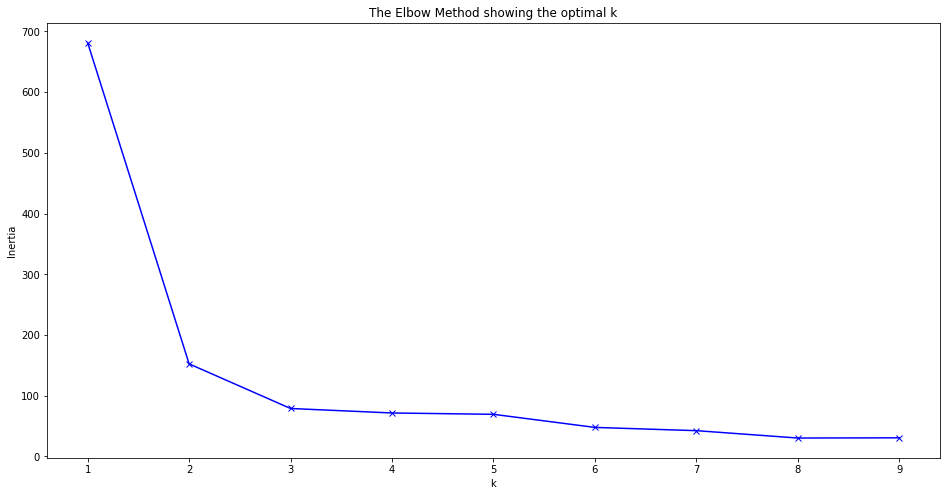

In [190]:
plt.figure(figsize=(16,8))
plt.plot(K, costs, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## For sk-learn algorithm 

In [191]:
inertias = []
K = range(1,10)
for k in K:
    kmeanModel_sk = KMeans(n_clusters=k)
    kmeanModel_sk.fit(X)
    inertias.append(kmeanModel_sk.inertia_)

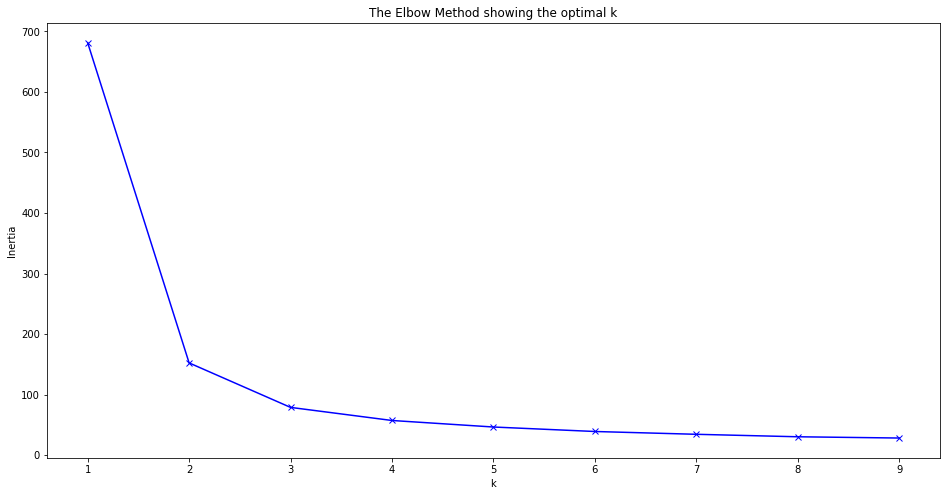

In [192]:
plt.figure(figsize=(16,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Conclusion: In both cases 3 classes for clustering are optimal!

# Silhouette analysis 

In [193]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

## For custom algorithm 

In [194]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.6810461692117462
For n_clusters = 3 The average silhouette_score is : 0.551191604619592
For n_clusters = 4 The average silhouette_score is : 0.49535632852884987
For n_clusters = 5 The average silhouette_score is : 0.3727766598756094
For n_clusters = 6 The average silhouette_score is : 0.43431953398540735


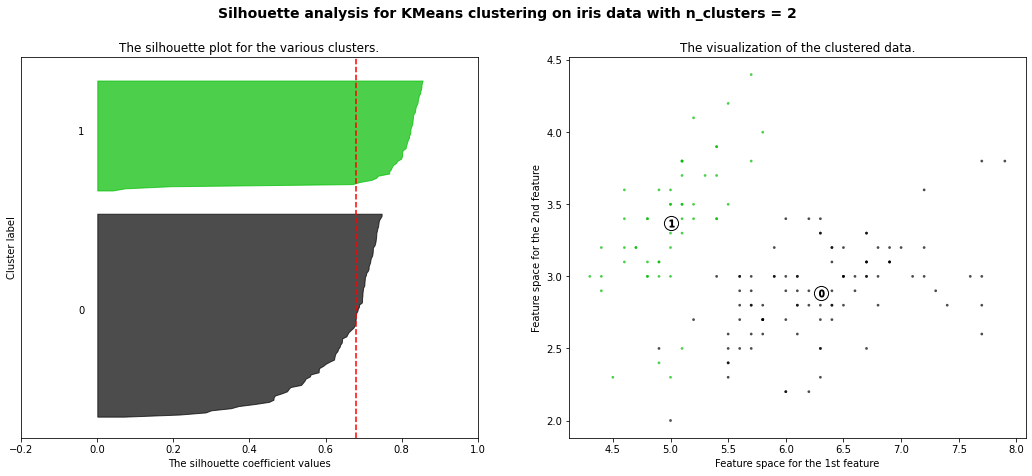

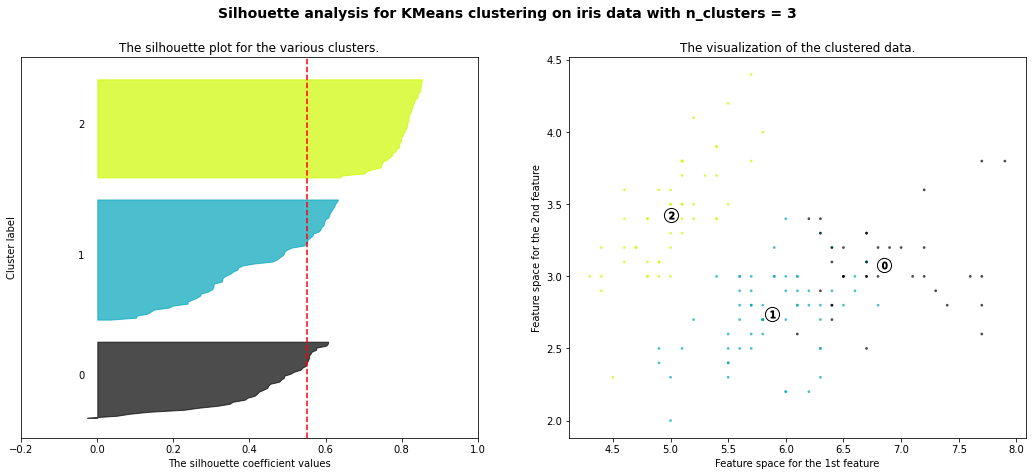

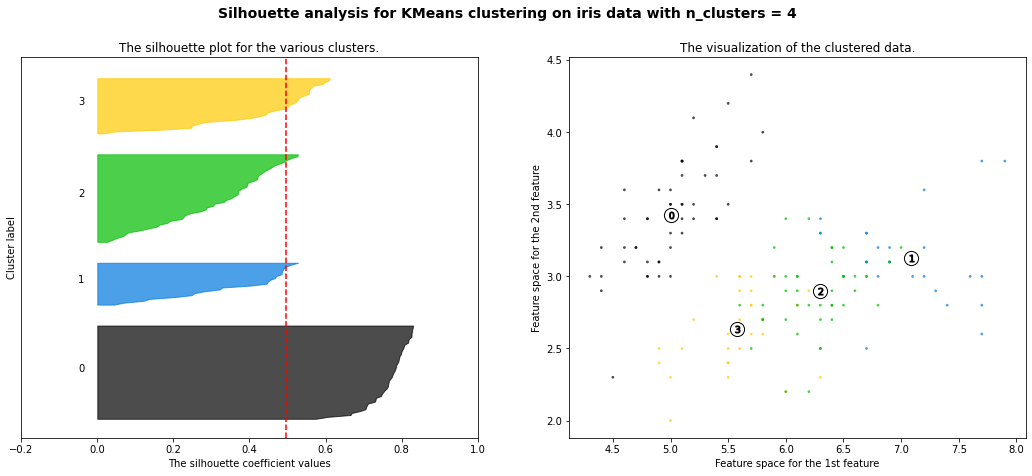

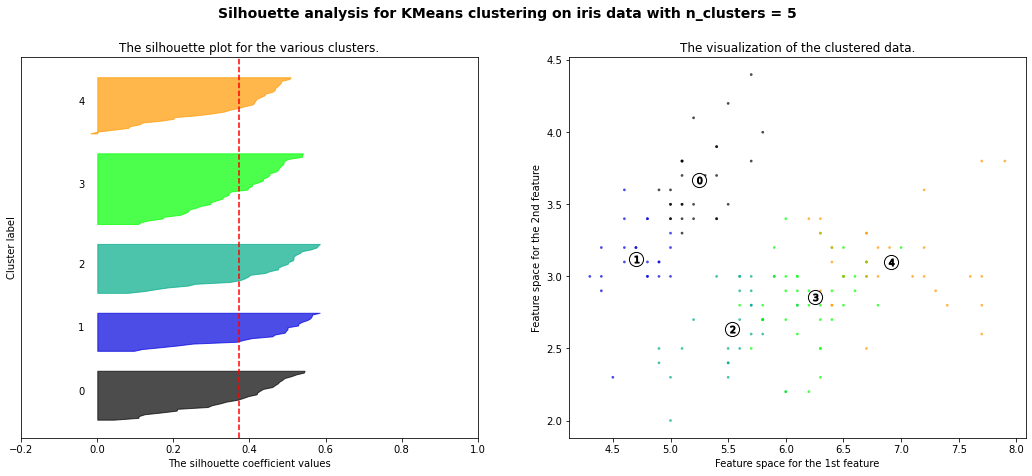

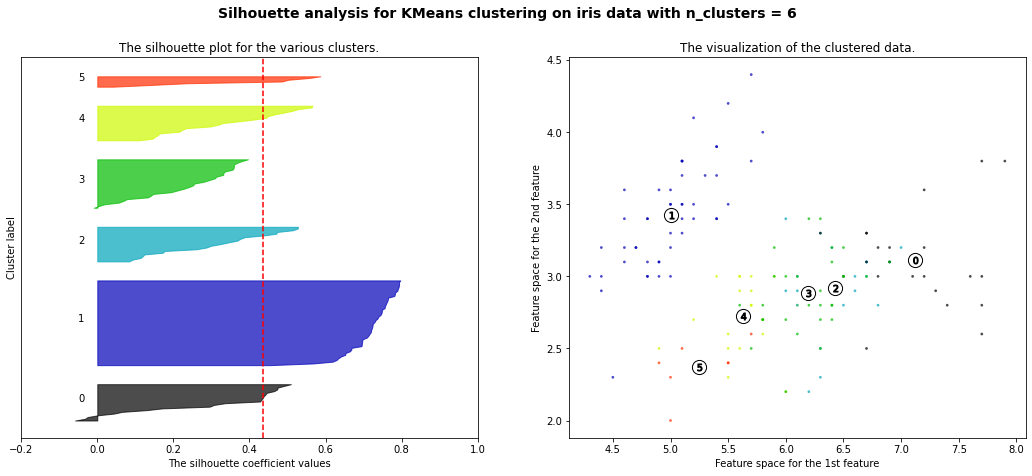

In [244]:
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1
    ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = Kmeans(n_clusters=n_clusters, random_state=123)
    clusterer.fit(X)
    cluster_labels = clusterer.predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.centroids
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on iris data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# For sk-learn algorithm

For n_clusters = 2 The average silhouette_score is : 0.6810461692117462
For n_clusters = 3 The average silhouette_score is : 0.5528190123564095
For n_clusters = 4 The average silhouette_score is : 0.49805050499728737
For n_clusters = 5 The average silhouette_score is : 0.48874888709310566
For n_clusters = 6 The average silhouette_score is : 0.36784649847122436


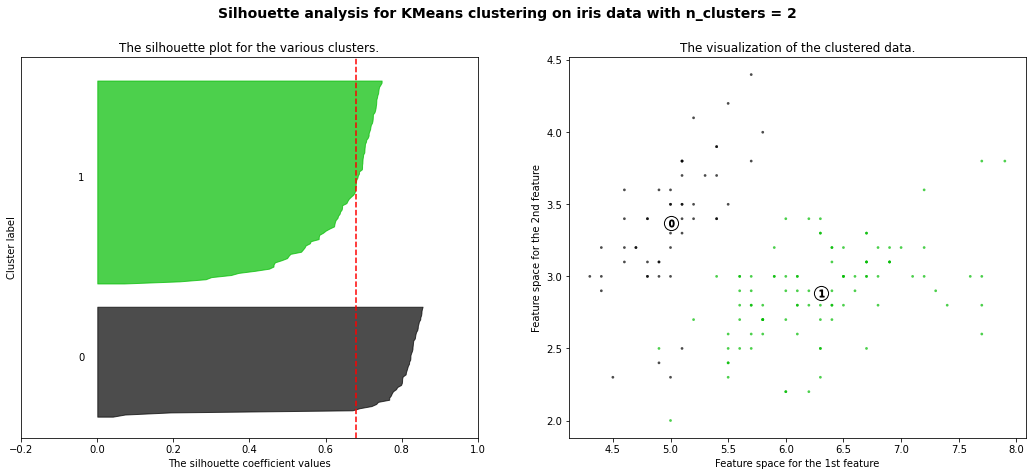

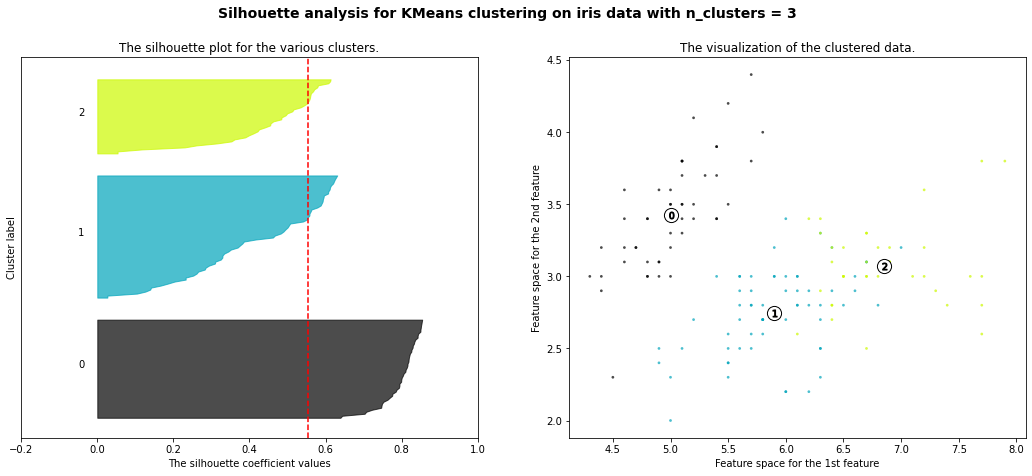

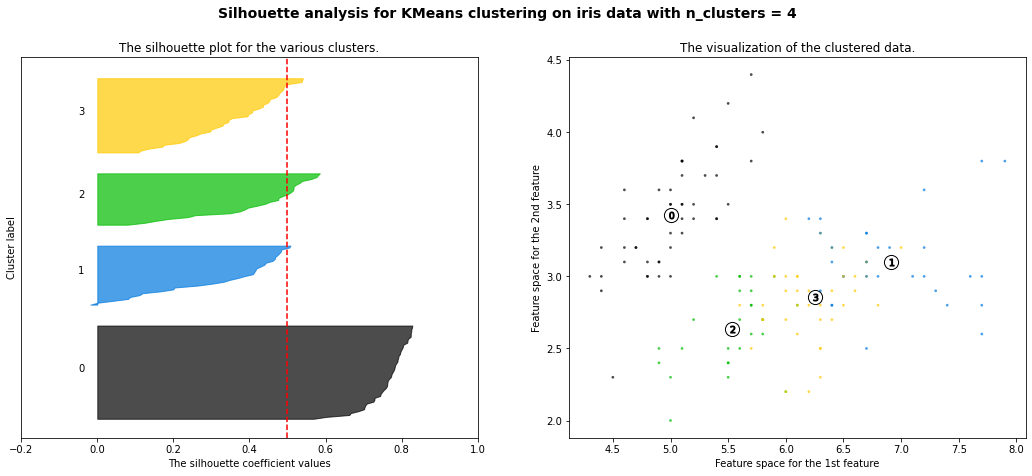

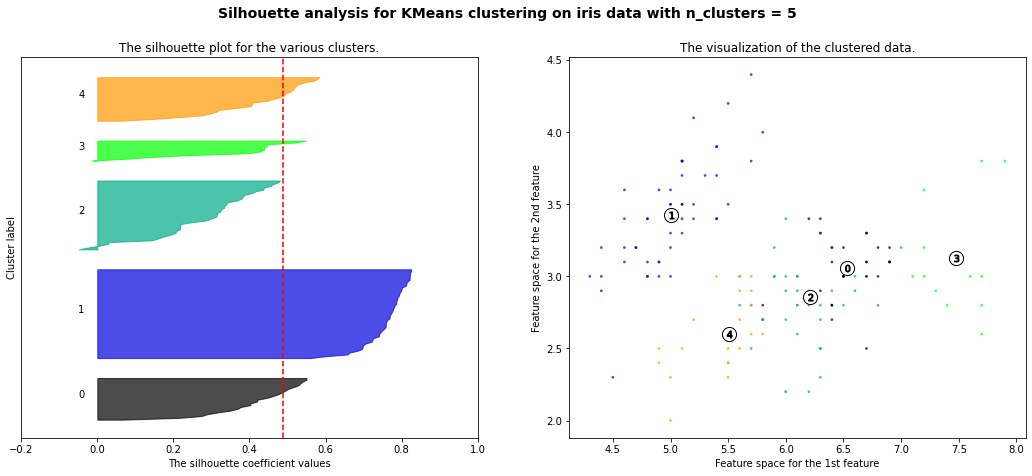

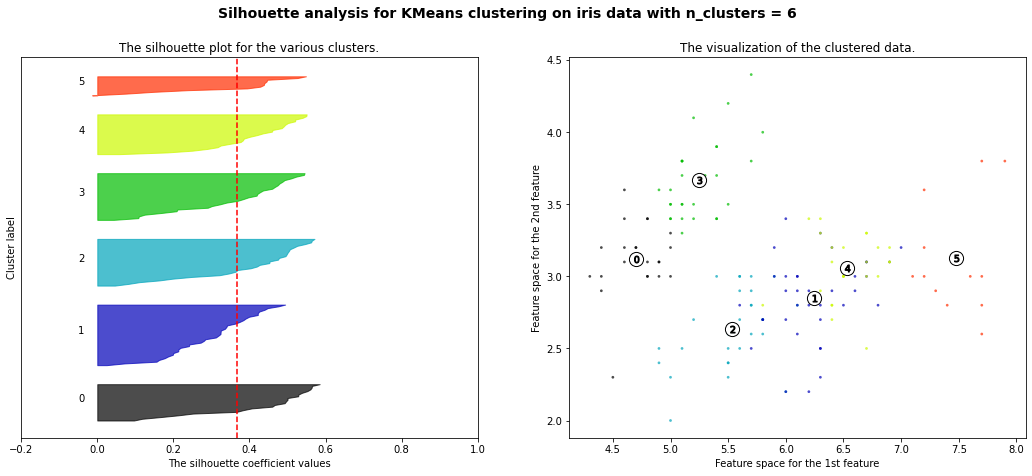

In [196]:
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1
    ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on iris data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# Homogeneity score

## For custom algorithm

In [197]:
from sklearn.metrics import homogeneity_score

In [210]:
km2 = Kmeans(n_clusters = 2, max_iter=1000, random_state=123)
km2.fit(X)

km3 = Kmeans(n_clusters = 3, max_iter=1000, random_state=123)
km3.fit(X)

km4 = Kmeans(n_clusters = 4, max_iter=1000, random_state=123)
km4.fit(X)

km5 = Kmeans(n_clusters = 5, max_iter=1000, random_state=123)
km5.fit(X)

km6 = Kmeans(n_clusters = 6, max_iter=1000, random_state=123)
km6.fit(X)

In [211]:
homogeneity_score(y, km2.labels)

0.5223224641010155

In [212]:
homogeneity_score(y, km3.labels)

0.7514854021988338

In [213]:
homogeneity_score(y, km4.labels)

0.7773202984748028

In [214]:
homogeneity_score(y, km5.labels)

0.8238829320940432

In [215]:
homogeneity_score(y, km6.labels)

0.8238829320940432

## For sk-learn algorithm

In [216]:
km2_sk = KMeans(n_clusters = 2).fit(X)

km3_sk = KMeans(n_clusters = 3).fit(X)

km4_sk = KMeans(n_clusters = 4).fit(X)

km5_sk = KMeans(n_clusters = 5).fit(X)

km6_sk = KMeans(n_clusters = 6).fit(X)

In [217]:
homogeneity_score(y, km2_sk.labels_)

0.5223224641010155

In [218]:
homogeneity_score(y, km3_sk.labels_)

0.7514854021988338

In [219]:
homogeneity_score(y, km4_sk.labels_)

0.8083138423637095

In [220]:
homogeneity_score(y, km5_sk.labels_)

0.8238829320940432

In [221]:
homogeneity_score(y, km6_sk.labels_)

0.8238829320940432

# Completeness score

## For custom algorithm

In [222]:
from sklearn.metrics.cluster import completeness_score

In [223]:
completeness_score(y, km2.labels)

0.8835142349190769

In [224]:
completeness_score(y, km3.labels)

0.7649861514489815

In [225]:
completeness_score(y, km4.labels)

0.637658844687231

In [226]:
completeness_score(y, km5.labels)

0.5992870646711901

In [227]:
completeness_score(y, km6.labels)

0.5204922514601253

## For sk-learn algorithm

In [228]:
completeness_score(y, km2_sk.labels_)

0.8835142349190769

In [229]:
completeness_score(y, km3_sk.labels_)

0.7649861514489815

In [230]:
completeness_score(y, km4_sk.labels_)

0.6522113355514313

In [231]:
completeness_score(y, km5_sk.labels_)

0.5992870646711901

In [232]:
completeness_score(y, km6_sk.labels_)

0.5204922514601253

# V measure

## For custom algorithm

In [233]:
from sklearn.metrics import v_measure_score

In [234]:
v_measure_score(y, km2.labels)

0.6565191143081123

In [235]:
v_measure_score(y, km3.labels)

0.7581756800057784

In [236]:
v_measure_score(y, km4.labels)

0.7005971301735522

In [237]:
v_measure_score(y, km5.labels)

0.6938628345588719

In [238]:
v_measure_score(y, km6.labels)

0.6379538800046878

## For sk-learn algorithm

In [239]:
v_measure_score(y, km2_sk.labels_)

0.6565191143081123

In [240]:
v_measure_score(y, km3_sk.labels_)

0.7581756800057784

In [241]:
v_measure_score(y, km4_sk.labels_)

0.721920386782096

In [242]:
v_measure_score(y, km5_sk.labels_)

0.6938628345588719

In [243]:
v_measure_score(y, km6_sk.labels_)

0.6379538800046878

Conslusion :  the goodness of the clustering partition is best for 3 classes!